In [2]:
from viafoundry.client import ViaFoundryClient
import json


In [8]:
# Make sure to authenticate it
#client = ViaFoundryClient("/Users/alper/.viaprod",  enable_session_history=True)
client = ViaFoundryClient("/Users/alper/.vialocal")
# client.configure_auth(username="YOUR_USER", password="YOUR_PASSWORD", hostname="YOUR_VIA_HOST")

In [9]:
report_data = client.reports.fetch_report_data(report_id="1")

process_names = client.reports.get_process_names(report_data)
print("Processes:", process_names)
filenames = client.reports.get_file_names(report_data, "RSEM_module")
print(filenames)
# We will use file_path to load the data


Processes: ['Overall_Summary', 'Salmon_module', 'Bam_Quantify_Module_STAR', 'DE_module_RSEM', 'RSEM_module', 'Sequential_Mapping_Module', 'MultiQC']
                                     id  processName  \
0  69b1232f-bfa1-4c99-96a1-cd30583af059  RSEM_module   
1  c8198894-7c0d-462e-a44f-35190326683e  RSEM_module   
2  9acfbf6e-a4ad-4d37-98e5-e8a6bfe6f3de  RSEM_module   
3  36a6a76a-43ab-4f8c-a906-4a9036745efb  RSEM_module   

                                     name extension  \
0     genes_expression_expected_count.tsv       tsv   
1                genes_expression_tpm.tsv       tsv   
2  isoforms_expression_expected_count.tsv       tsv   
3             isoforms_expression_tpm.tsv       tsv   

                                           file_path  fileSize  \
0   rsem_summary/genes_expression_expected_count.tsv     65181   
1              rsem_summary/genes_expression_tpm.tsv     65639   
2  rsem_summary/isoforms_expression_expected_coun...     99601   
3           rsem_summary/isofo

In [5]:
rsem_data = client.reports.load_file(report_data, "rsem_summary/genes_expression_expected_count.tsv")
# To download the file you can use the line below.
# client.reports.download_file(report_data, "rsem_summary/genes_expression_expected_count.tsv")

print(rsem_data)

             gene                                         transcript  \
0       LINC02849                                  ENST00000650562.1   
1         RPS4XP1                                  ENST00000482189.1   
2      AC012184.1                                  ENST00000566960.1   
3       RN7SKP245                                  ENST00000364025.1   
4         SNORD1B                                  ENST00000363091.1   
...           ...                                                ...   
60586      CDKN2C  ENST00000262662.5,ENST00000371761.4,ENST000003...   
60587       RIMS2  ENST00000262231.14,ENST00000339750.3,ENST00000...   
60588      P2RY10  ENST00000171757.3,ENST00000461541.5,ENST000004...   
60589  AP004607.7                                  ENST00000527152.1   
60590  AC008708.1                                  ENST00000517346.1   

       LPS_1h_rep1  LPS_1h_rep2  ctrl_0h_rep1  ctrl_0h_rep2  
0              1.0          0.0           0.0           0.0  
1          

In [6]:
directories = client.reports.get_report_dirs(report_id="2523")
print("Directories:", directories)

Directories: {'rsem_summary', 'multiqc', 'summary', 'kallisto_count', 'featureCounts_after_STAR_details', 'featureCounts_after_STAR_summary'}


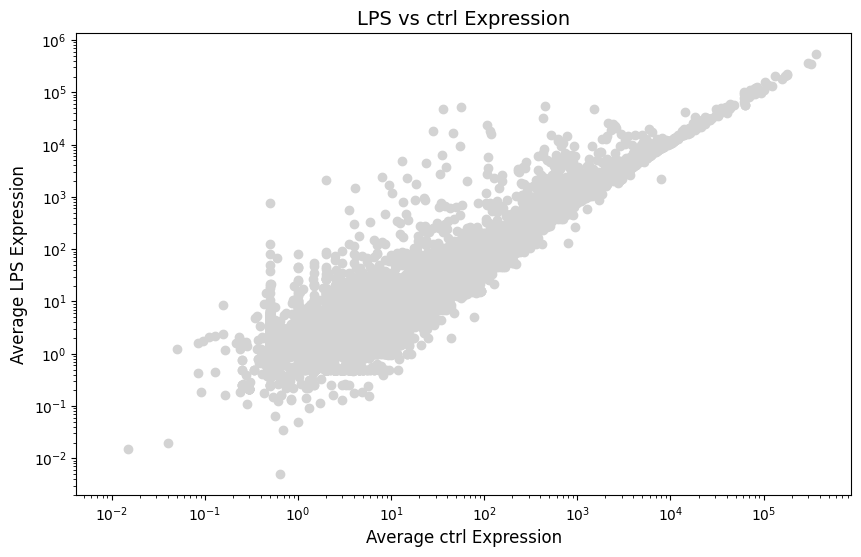

In [46]:
# prompt: Write a script to Create a scatter plot using rsem_data by getting the average of LPS vs ctrl columns in ligth grey and log Scale. The column prefixes are LPS and ctrl. Make sure to complete full column name yourself to get average for each condition. And save the file as plot.png

import pandas as pd
import matplotlib.pyplot as plt

# Assuming rsem_data is a pandas DataFrame
# Calculate the average of LPS and ctrl columns
lps_cols = [col for col in rsem_data.columns if col.startswith('LPS')]
ctrl_cols = [col for col in rsem_data.columns if col.startswith('ctrl')]

if not lps_cols or not ctrl_cols:
    print("No LPS or ctrl columns found in the data.")
else:
    rsem_data['LPS_avg'] = rsem_data[lps_cols].mean(axis=1)
    rsem_data['ctrl_avg'] = rsem_data[ctrl_cols].mean(axis=1)

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(rsem_data['ctrl_avg'], rsem_data['LPS_avg'], color='lightgrey')
    plt.xlabel('Average ctrl Expression', fontsize=12)
    plt.ylabel('Average LPS Expression', fontsize=12)
    plt.title('LPS vs ctrl Expression', fontsize=14)
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig('plot.png')
    plt.show()

In [ ]:
response = client.reports.upload_report_file(
    report_id="1",
    local_file_path="examples/plot.png",
    dir="summary"
)
print("Upload Response:", response)

RuntimeError: Error 602: Failed to upload file to report: [Errno 2] No such file or directory: 'examples/plot.png'

In [ ]:
response = client.reports.upload_session_history(
    report_id="2523",
    dir="summary"
)

Overwriting file.


In [21]:
%history

from viafoundry.client import ViaFoundryClient
import json
import getpass
# Make sure to authenticate it
client = ViaFoundryClient("/Users/alper/.viaprod")
# client.configure_auth(username="YOUR_USER", password="YOUR_PASSWORD", hostname="YOUR_VIA_HOST")
report_data = client.reports.fetch_report_data(report_id="2523")

process_names = client.reports.get_process_names(report_data)
print("Processes:", process_names)
filenames = client.reports.get_file_names(report_data, "RSEM_module")
print(filenames[["file_path","fileSize"]])
# We will use file_path to load the data
rsem_data = client.reports.load_file(report_data, "rsem_summary/genes_expression_expected_count.tsv")
# To download the file you can use the line below.
# client.reports.download_file(report_data, "rsem_summary/genes_expression_expected_count.tsv")

print(rsem_data)
directories = client.reports.get_report_dirs(report_id="2523")
print("Directories:", directories)
# prompt: Write a script to Create a scatter plot using rsem_dat